In [1]:
%matplotlib notebook
import requests
import json, time, datetime, math
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal, fftpack
import dataloader

#helper functions
def print_time(unix, msg=''):
    print(msg, time.ctime(int(unix)))
    
def get_readable_time(unix):
    return [time.ctime(int(u)) for u in unix]

def plot_corr(df):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(9,9))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    fig.show()

data = dataloader.load_data()

In [2]:
data.describe()

,btc_close,btc_quoteVolume,btc_volume,eth_close,eth_quoteVolume,eth_volume,ltc_close,ltc_quoteVolume,ltc_volume,xrp_close,xrp_quoteVolume,xrp_volume,date,vader_sent,favorites,lex_sent,cnn_sent,cnn_pos_neg
count,236422.000000,236422.000000,2.364220e+05,236422.000000,236422.000000,2.364220e+05,236422.000000,236422.000000,2.364220e+05,236422.000000,2.364220e+05,2.364220e+05,2.364220e+05,236422.000000,236422.000000,236422.000000,236422.000000,236422.000000
mean,3148.680961,17.588160,8.234036e+04,196.002233,121.952556,2.726576e+04,44.094245,167.337625,9.779612e+03,0.214745,4.299755e+04,1.689600e+04,1.487073e+09,0.075893,54.364662,0.207908,0.971984,0.142455
std,4057.771504,37.458875,2.069261e+05,290.471158,351.823826,7.859526e+04,69.879425,574.358053,3.475104e+04,0.419475,1.559439e+05,7.557816e+04,2.047479e+07,0.217472,307.519654,0.192007,0.029939,0.972757
min,320.000000,0.000000,0.000000e+00,0.914500,0.000000,0.000000e+00,1.642982,0.000000,0.000000e+00,0.004653,0.000000e+00,0.000000e+00,1.451610e+09,-0.880754,0.000000,-1.431429,0.788091,-1.000000
25%,607.250000,0.109672,6.626135e+01,10.708558,0.090000,1.024082e+00,3.831749,0.000000,0.000000e+00,0.006449,0.000000e+00,0.000000e+00,1.469341e+09,-0.012900,4.000000,0.090625,0.962209,-1.000000
50%,1019.000000,4.032870,5.994774e+03,14.220000,13.912651,7.474434e+02,4.317064,1.082967,9.692181e+00,0.008212,6.500000e+01,1.010090e+00,1.487073e+09,0.039245,11.000000,0.200000,0.982190,1.000000
75%,4180.000000,19.641872,7.912163e+04,299.233996,98.119279,1.947630e+04,51.800000,95.050303,5.447225e+03,0.224800,2.596792e+04,5.968689e+03,1.504804e+09,0.200550,34.833333,0.312222,0.993355,1.000000
max,19896.687300,1244.437950,8.905612e+06,1422.470000,19291.196376,2.635970e+06,368.150478,32951.458996,2.443437e+06,3.279770,1.090036e+07,5.605004e+06,1.522536e+09,0.942464,77813.333333,3.470000,0.999994,1.000000


<IPython.core.display.Javascript object>


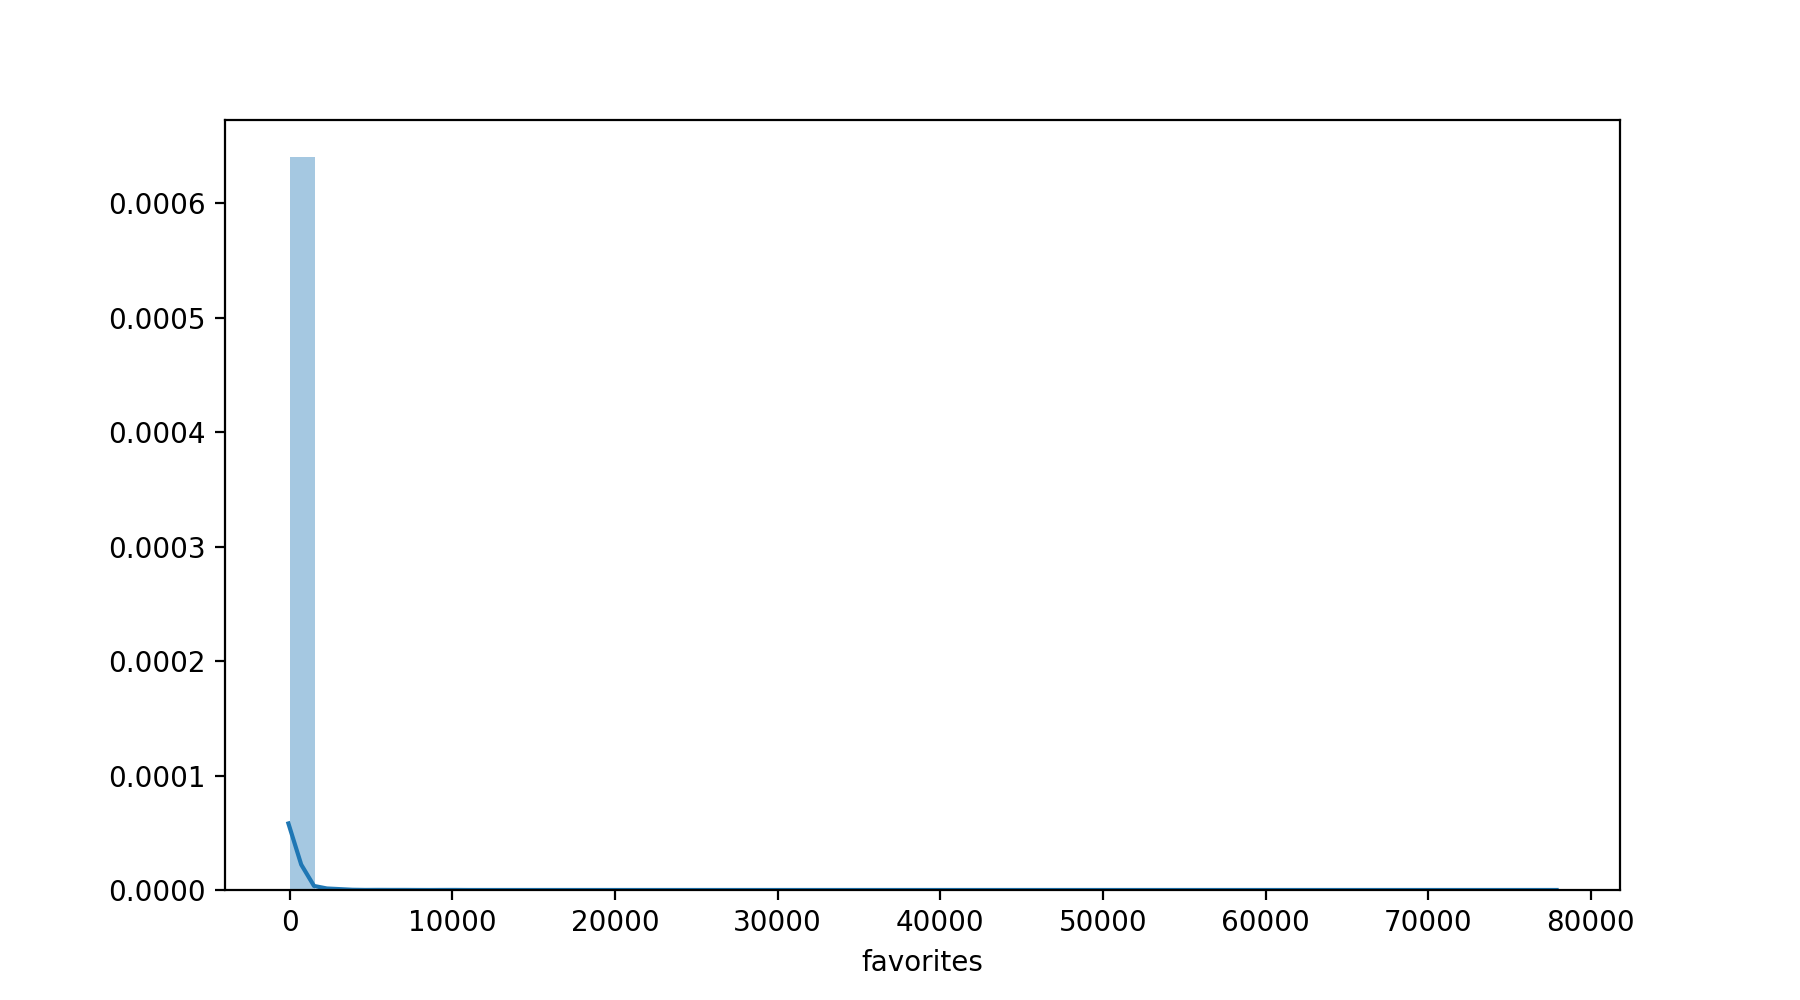

In [8]:
f, ax = plt.subplots(figsize=(9, 5))
sns.distplot(data['favorites'])

<IPython.core.display.Javascript object>


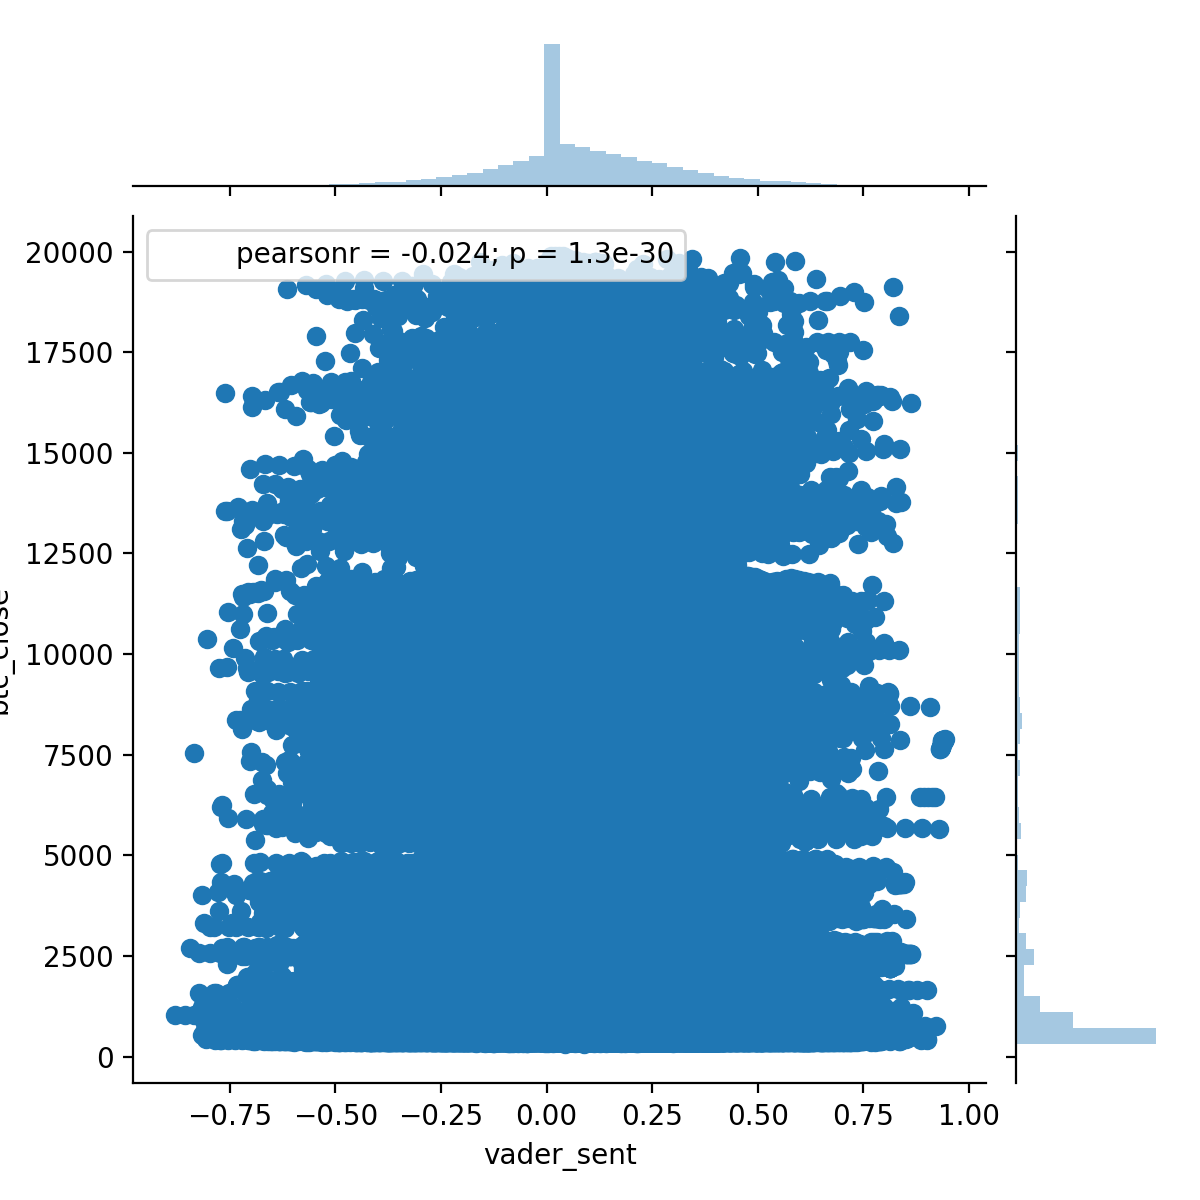

In [11]:
#f, ax = plt.subplots(figsize=(9, 5))
sns.jointplot(x="vader_sent", y="btc_close", data=data)

<IPython.core.display.Javascript object>


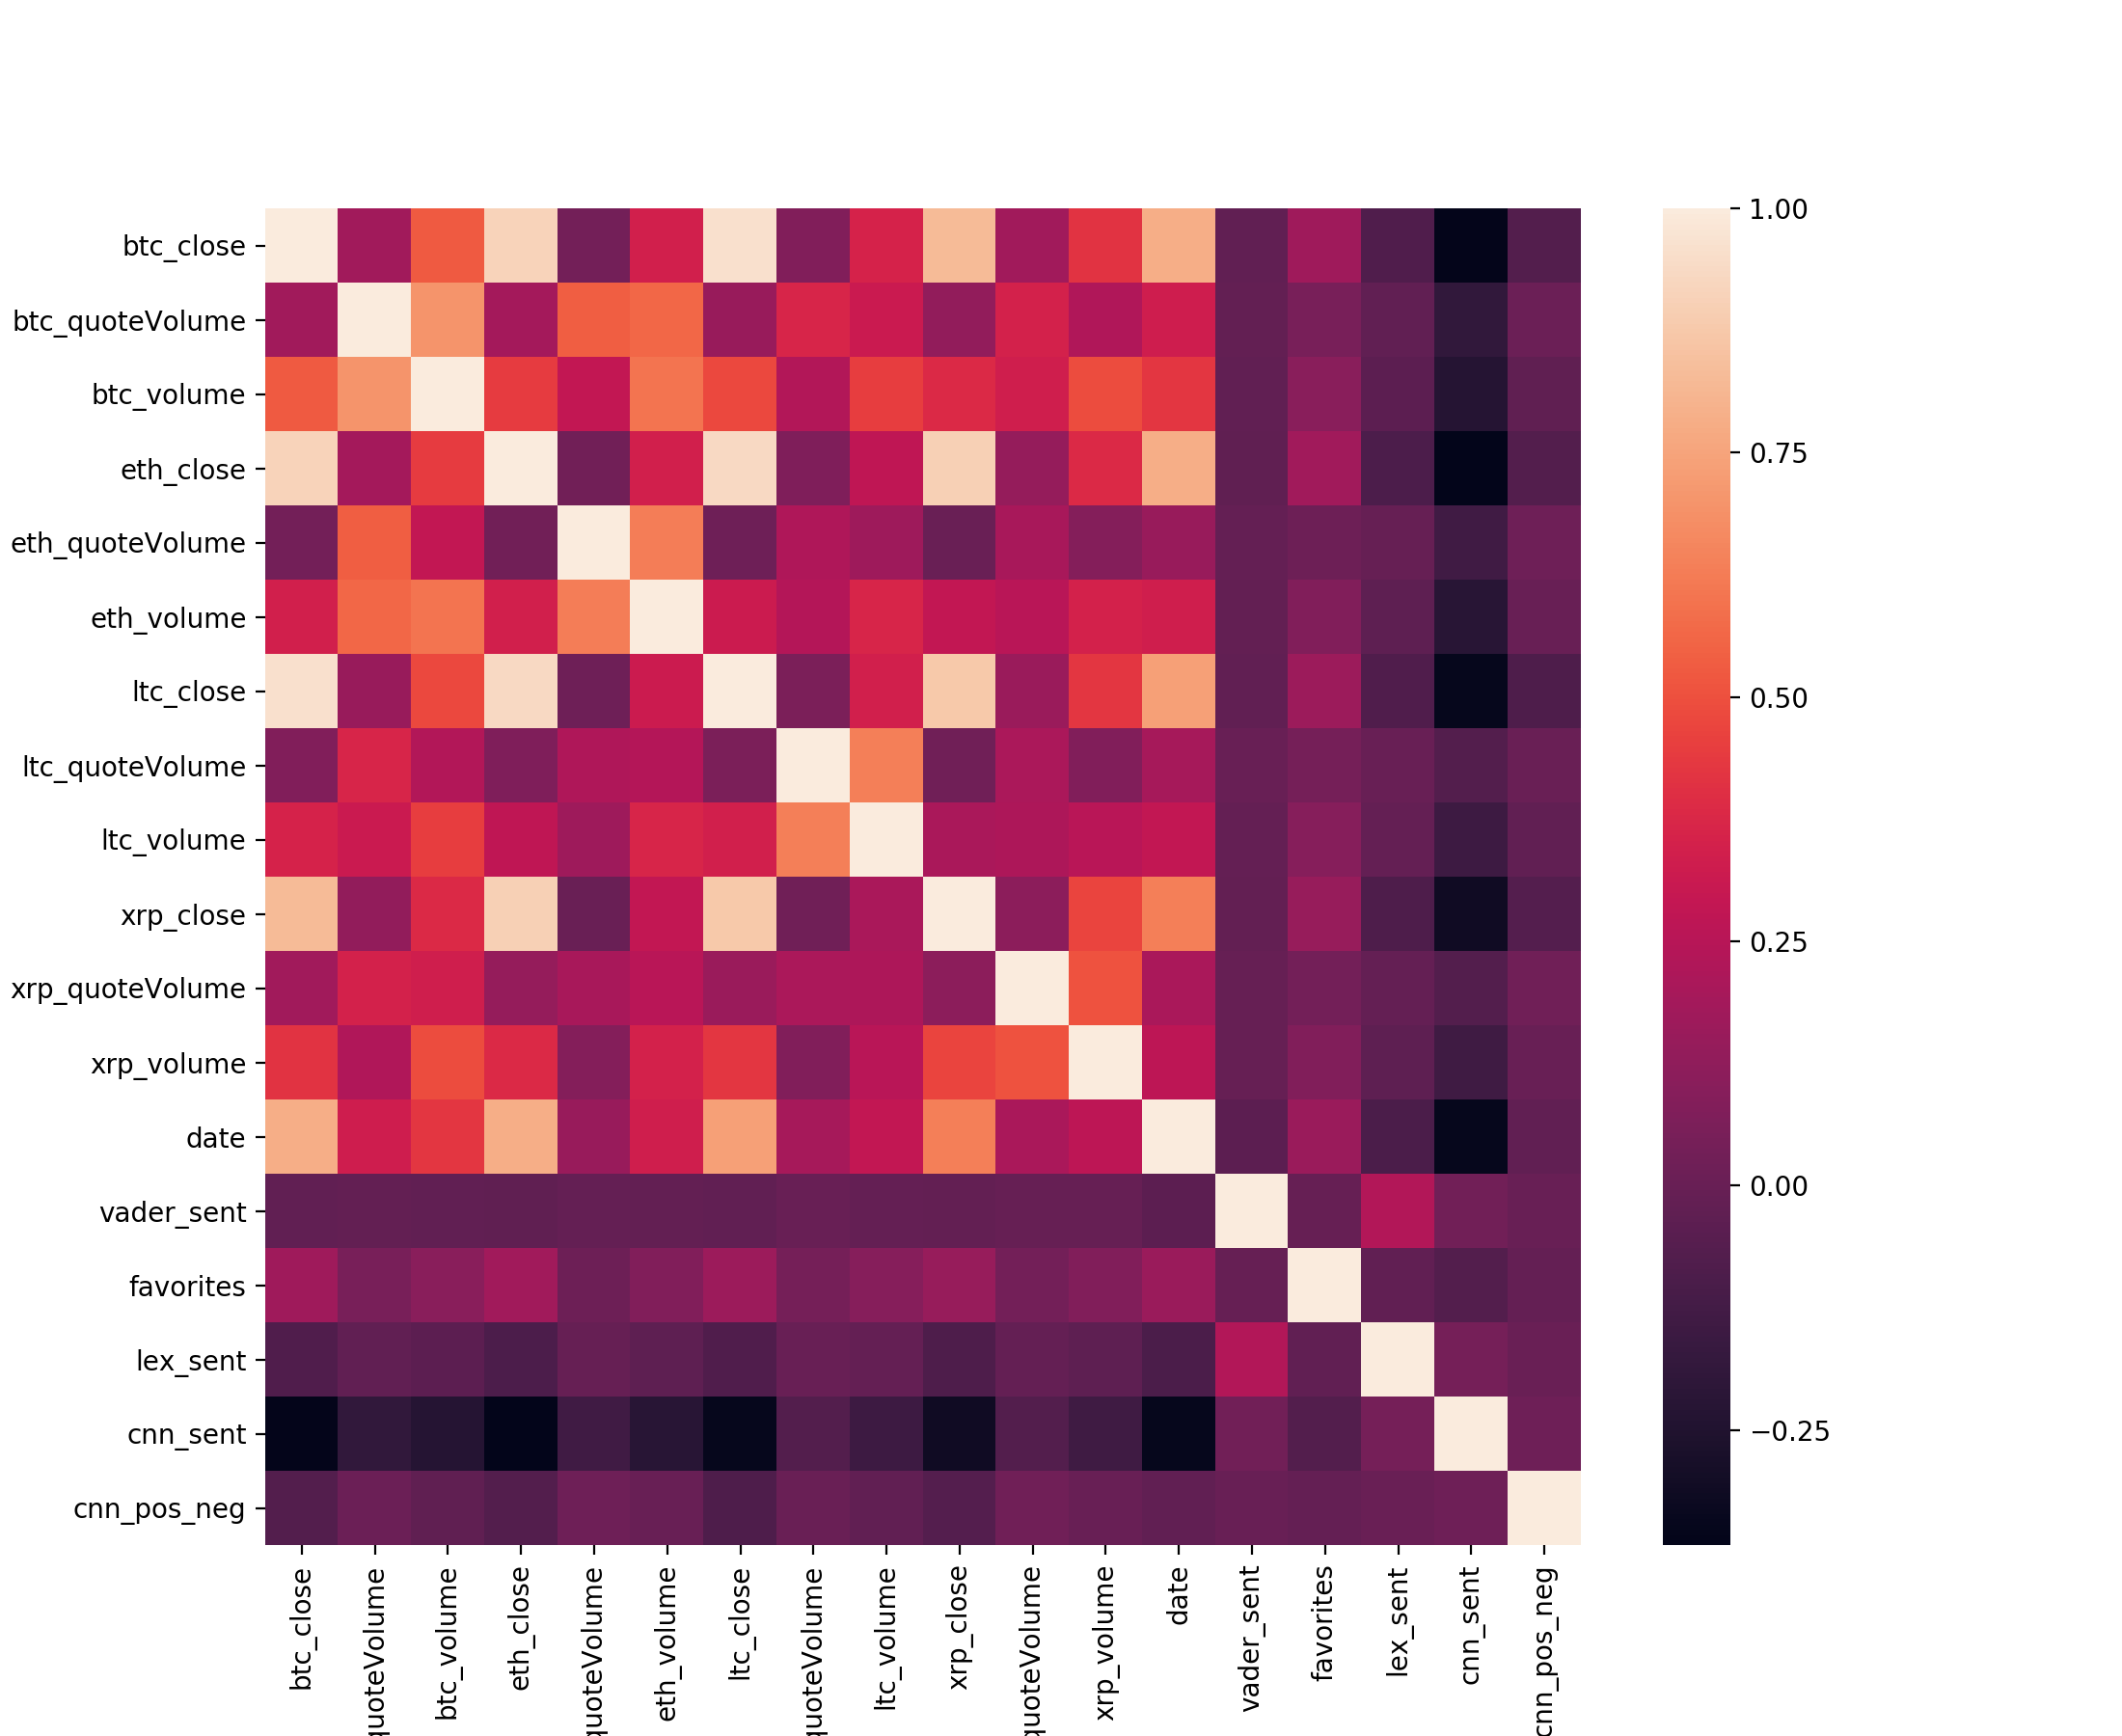

In [6]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(11, 9))
#sns.heatmap(corrmat, vmax=.8, square=True);
sns.heatmap(corrmat)

In [ ]:
import sklearn.preprocessing as prep

df = data[100000:100005]
df


In [ ]:
np.set_printoptions(suppress=True)
scaler = prep.MinMaxScaler()
df_trans = scaler.fit_transform(df)
df_trans

In [ ]:
#236422
#227494
s = "01/03/2018"
split_time = time.mktime(datetime.datetime.strptime(s, "%d/%m/%Y").timetuple())
data.query('date<=@split_time').info()

In [5]:
def window_stack(a, stepsize=1, width=3):
    n = a.shape[0]
    return np.hstack( a[i:1+n+i-width:stepsize] for i in range(0,width) )

I = np.arange(3) + np.arange(8 - 3 + 1).reshape(-1, 1)

a = np.arange(10)
window_stack(a)

array([0, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6, 7,
       8, 9])

In [12]:
np.arange(10) + np.arange(10, step=5).reshape(-1,1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]])